# Week 5 - Vector Space Model (VSM) and Topic Modeling

Over the next weeks, we are going to re-implement Sherin's algorithm and apply it to the text data we've been working on last week! Here's our roadmap:

**Week 6 - vectorization and linear algebra**
6. Dampen: weight the frequency of words (1 + log[count])
7. Scale: Normalize weighted frequency of words
8. Direction: compute deviation vectors

**Week 7 - Clustering**
9. apply different unsupervised machine learning algorithms
    * figure out how many clusters we want to keep
    * inspect the results of the clustering algorithm

**Week 8 - Visualizing the results**
10. create visualizations to compare documents

# WEEK 5 - DATA CLEANING

## Step 1 - Data Retrieval

In [1]:
# using glob, find all the text files in the poe_complete_works folder
import glob

files = glob.glob('./complete_works_poe/*.txt')
print(files)

['./poe_complete_works/vol2.txt', './poe_complete_works/vol1.txt']


In [2]:
# get all the data from the text files into the "documents" list
# P.S. make sure you use the 'utf-8' encoding
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        documents.append(f.read())
        
for i, doc in enumerate(documents):
    documents[i] = documents[i].lower()

print(documents[0])

the works of edgar allan poe

volume ii

the raven edition

[redactor's note--some endnotes are by poe and some were added by
griswold. in this volume the notes are at the end.]

contents:

     the purloined letter
     the thousand-and-second tale of scheherezade
     a descent into the maelstroem
     von kempelen and his discovery
     mesmeric revelation
     the facts in the case of m. valdemar
     the black cat
     the fall of the house of usher
     silence--a fable
     the masque of the red death
     the cask of amontillado
     the imp of the perverse
     the island of the fay
     the assignation
     the pit and the pendulum
     the premature burial
     the domain of arnheim
     landor's cottage
     william wilson
     the tell-tale heart
     berenice
     eleonora




the purloined letter

     nil sapientiae odiosius acumine nimio.

                                _seneca_.

at paris, just after dark one gusty evening in the autumn of 18-, i was
enjoying the two

In [3]:
# print the first 1000 characters of the first document to see what it 
# looks like (we'll use this as a sanity check below)
documents[0][:1500]

"the works of edgar allan poe\n\nvolume ii\n\nthe raven edition\n\n[redactor's note--some endnotes are by poe and some were added by\ngriswold. in this volume the notes are at the end.]\n\ncontents:\n\n     the purloined letter\n     the thousand-and-second tale of scheherezade\n     a descent into the maelstroem\n     von kempelen and his discovery\n     mesmeric revelation\n     the facts in the case of m. valdemar\n     the black cat\n     the fall of the house of usher\n     silence--a fable\n     the masque of the red death\n     the cask of amontillado\n     the imp of the perverse\n     the island of the fay\n     the assignation\n     the pit and the pendulum\n     the premature burial\n     the domain of arnheim\n     landor's cottage\n     william wilson\n     the tell-tale heart\n     berenice\n     eleonora\n\n\n\n\nthe purloined letter\n\n     nil sapientiae odiosius acumine nimio.\n\n                                _seneca_.\n\nat paris, just after dark one gusty evening 

## Step 2 - Data Cleaning

In [4]:
# only select the text that's between the first occurence of the 
# the word "abstract" and the last occurence of the word "reference"
# Optional: print the length of the string before and after, as a 
# sanity check
# HINT: https://stackoverflow.com/questions/14496006/finding-last-occurrence-of-substring-in-string-replacing-that
# read more about rfind: https://www.tutorialspoint.com/python/string_rfind.htm

# for i,doc in enumerate(documents):
#     print(len(documents[i]), end=' ')
#     # save the result
#     documents[i] = doc
#     # print the length of the resulting string
#     print(len(documents[i]))
    
# one liner:
# documents = [doc[doc.index('abstract'):doc.rfind('reference')] for doc in documents]

# this is unnessary for this data set

In [5]:
# replace carriage returns (i.e., "\n") with a white space
# check that the result looks okay by printing the 
# first 1000 characters of the 1st doc:

documents = [doc.replace('\n', ' ') for doc in documents]
print(documents[0][:1000])

the works of edgar allan poe  volume ii  the raven edition  [redactor's note--some endnotes are by poe and some were added by griswold. in this volume the notes are at the end.]  contents:       the purloined letter      the thousand-and-second tale of scheherezade      a descent into the maelstroem      von kempelen and his discovery      mesmeric revelation      the facts in the case of m. valdemar      the black cat      the fall of the house of usher      silence--a fable      the masque of the red death      the cask of amontillado      the imp of the perverse      the island of the fay      the assignation      the pit and the pendulum      the premature burial      the domain of arnheim      landor's cottage      william wilson      the tell-tale heart      berenice      eleonora     the purloined letter       nil sapientiae odiosius acumine nimio.                                  _seneca_.  at paris, just after dark one gusty evening in the autumn of 18-, i was enjoying the two

In [6]:
# replace the punctation below by a white space
# check that the result looks okay 
# (e.g., by print the first 1000 characters of the 1st doc)

punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,doc in enumerate(documents): 
    for punc in punctuation: 
        doc = doc.replace(punc, ' ')
    documents[i] = doc
    
print(documents[0][:1000])

the works of edgar allan poe  volume ii  the raven edition   redactor s note  some endnotes are by poe and some were added by griswold  in this volume the notes are at the end    contents        the purloined letter      the thousand and second tale of scheherezade      a descent into the maelstroem      von kempelen and his discovery      mesmeric revelation      the facts in the case of m  valdemar      the black cat      the fall of the house of usher      silence  a fable      the masque of the red death      the cask of amontillado      the imp of the perverse      the island of the fay      the assignation      the pit and the pendulum      the premature burial      the domain of arnheim      landor s cottage      william wilson      the tell tale heart      berenice      eleonora     the purloined letter       nil sapientiae odiosius acumine nimio                                    seneca    at paris  just after dark one gusty evening in the autumn of 18   i was enjoying the two

In [7]:
# remove numbers by either a white space or the word "number"
# again, print the first 1000 characters of the first document
# to check that you're doing the right thing
for i,doc in enumerate(documents): 
    for num in range(10):
        doc = doc.replace(str(num), '')
    documents[i] = doc

print(documents[1][:1000])

the works of edgar allan poe  in five volumes   the raven edition     volume i   contents        edgar allan poe  an appreciation      life of poe  by james russell lowell      death of poe  by n  p  willis      the unparalleled adventures of one hans pfaall      the gold bug      four beasts in one      the murders in the rue morgue      the mystery of marie rogt      the balloon hoax      ms  found in a bottle      the oval portrait     edgar allan poe  an appreciation      caught from some unhappy master whom unmerciful disaster    followed fast and followed faster till his songs one burden bore      till the dirges of his hope that melancholy burden bore          of  never  never more    this stanza from  the raven  was recommended by james russell lowell as an inscription upon the baltimore monument which marks the resting place of edgar allan poe  the most interesting and original figure in american letters  and  to signify that peculiar musical quality of poe s genius which inth

In [8]:
# Remove the stop words below from our documents
# print the first 1000 characters of the first document
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']


# remove stop words
for i,doc in enumerate(documents):
    for stop_word in stop_words:
        doc = doc.replace(' ' + stop_word + ' ', ' ')
    documents[i] = doc

print(documents[0][:1000])

the works edgar allan poe  volume ii  raven edition   redactor note  endnotes poe added griswold  volume notes end    contents        purloined letter      thousand second tale scheherezade      descent maelstroem      von kempelen discovery      mesmeric revelation      facts case m  valdemar      black cat      fall house usher      silence  fable      masque red death      cask amontillado      imp perverse      island fay      assignation      pit pendulum      premature burial      domain arnheim      landor cottage      william wilson      tell tale heart      berenice      eleonora     purloined letter       nil sapientiae odiosius acumine nimio                                    seneca    paris  dark one gusty evening autumn    enjoying twofold luxury meditation meerschaum  company friend c  auguste dupin  little back library  book closet  au troisieme     rue dunot  faubourg st  germain  one hour least maintained profound silence   casual observer  might seemed intently exclus

In [9]:
# remove words with one and two characters (e.g., 'd', 'er', etc.)
# print the first 1000 characters of the first document

for i,doc in enumerate(documents):  
    doc = [x for x in doc.split() if len(x) > 2]
    doc = " ".join(doc)
    documents[i] = doc

print(documents[0][:1000])

the works edgar allan poe volume raven edition redactor note endnotes poe added griswold volume notes end contents purloined letter thousand second tale scheherezade descent maelstroem von kempelen discovery mesmeric revelation facts case valdemar black cat fall house usher silence fable masque red death cask amontillado imp perverse island fay assignation pit pendulum premature burial domain arnheim landor cottage william wilson tell tale heart berenice eleonora purloined letter nil sapientiae odiosius acumine nimio seneca paris dark one gusty evening autumn enjoying twofold luxury meditation meerschaum company friend auguste dupin little back library book closet troisieme rue dunot faubourg germain one hour least maintained profound silence casual observer might seemed intently exclusively occupied curling eddies smoke oppressed atmosphere chamber however mentally discussing certain topics formed matter conversation earlier period evening mean affair rue morgue mystery attending murd


### Putting it all together

In [10]:
# package all of your work above into a function that cleans a given document

def clean_list_of_documents(documents):
    
    cleaned_docs = []

    for i,doc in enumerate(documents):
        # only keep the text after the abstract
        # doc = doc[doc.index('abstract'):]
        # only keep the text before the references
        # doc = doc[:doc.rfind('reference')]
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
        # remove ponctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # remove stop words
        for stop_word in stop_words:
            doc = doc.replace(' ' + stop_word + ' ', ' ')
        # remove single characters and stem the words 
        doc = [x for x in doc.split() if len(x) > 2]
        doc = " ".join(doc)
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs

In [11]:
# reimport your raw data
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        documents.append(f.read())
        
for i, doc in enumerate(documents):
    documents[i] = documents[i].lower()
        
# clean your files using the function above
docs = clean_list_of_documents(documents)

# print the first 1000 characters of the first document
print(docs[0][:1000])

the works edgar allan poe volume raven edition redactor note endnotes poe added griswold volume notes end contents purloined letter thousand second tale scheherezade descent maelstroem von kempelen discovery mesmeric revelation facts case valdemar black cat fall house usher silence fable masque red death cask amontillado imp perverse island fay assignation pit pendulum premature burial domain arnheim landor cottage william wilson tell tale heart berenice eleonora purloined letter nil sapientiae odiosius acumine nimio seneca paris dark one gusty evening autumn enjoying twofold luxury meditation meerschaum company friend auguste dupin little back library book closet troisieme rue dunot faubourg germain one hour least maintained profound silence casual observer might seemed intently exclusively occupied curling eddies smoke oppressed atmosphere chamber however mentally discussing certain topics formed matter conversation earlier period evening mean affair rue morgue mystery attending murd

## Step 3 - Build your list of vocabulary

This list of words (i.e., the vocabulary) is going to become the columns of your matrix.

In [12]:
import math
import numpy as np

In [13]:
# create a function that takes in a list of documents
# and returns a set of unique words. Make sure that you
# sort the list alphabetically before returning it. 

def get_vocabulary(docs):
    voc = []
    for doc in docs:
        for word in doc.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary (it should be 
# around 5500 words)
vocabulary = get_vocabulary(docs)
print(len(vocabulary))

13925


## Step 4 - transform your documents in to 100-words chunks

In [14]:
# create a function that takes in a list of documents
# and returns a list of 100-words chunk 
# (with a 25 words overlap between them)
# Optional: add two arguments, one for the number of words
# in each chunk, and one for the overlap

def flatten_and_overlap(docs, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_documents = []
    
    # flatten everything into one string
    flat = ""
    for doc in docs:
        flat += doc
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_documents.append(flat[low:high])
        high += overlap
    return new_list_of_documents

chunks = flatten_and_overlap(docs)

In [15]:
# create a for loop to double check that each chunk has 
# a length of 100
# Optional: use assert to do this check
for chunk in chunks: 
    assert(len(chunk) == 100)
    
print(len(chunks))

3540


# WEEK 6 - VECTOR MANIPULATION

## Step 5 - Create a word by document matrix

In [16]:
# 1) create an empty dataframe using pandas
# the number of rows should be the number of chunks we have
# the number of columns should be size of the vocabulary
import pandas as pd
df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540 entries, 0 to 3539
Columns: 13925 entries, aaem to zusammen
dtypes: int64(13925)
memory usage: 376.1 MB


In [17]:
print(vocabulary)

['aaem', 'aaraaf', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abased', 'abasement', 'abated', 'abbey', 'abbeys', 'abbreviation', 'abdomen', 'abernethy', 'aberration', 'abeyance', 'abhorrence', 'abide', 'abilities', 'ability', 'abject', 'able', 'abnormal', 'abominable', 'abortive', 'abound', 'abounding', 'abounds', 'about', 'abroad', 'abrupt', 'abruptly', 'absconded', 'absence', 'absences', 'absent', 'absented', 'absolute', 'absolutely', 'absolved', 'absorbed', 'absorbing', 'abstract', 'abstracted', 'abstraction', 'abstractions', 'abstractly', 'abstruse', 'abstruseness', 'absurd', 'absurdities', 'absurdity', 'absurdly', 'abundance', 'abundant', 'abundantly', 'abuse', 'abuses', 'abusing', 'abyss', 'abysses', 'academies', 'academy', 'acanthus', 'accede', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accent', 'accents', 'accentuation', 'accept', 'acceptance', 'acceptation', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accesso

In [18]:
# 2) fill out the dataframe with the count of words for each document
# (use two for loops to iterate through the documents and the vocabulary)
for i,chunk in enumerate(chunks):
    for word in chunk:
        if word in df.columns: 
            df.loc[i,word] += 1

In [19]:
# 3) Sanity check: make sure that your counts are correct
# (e.g., if you know that a words appears often in a document, check that
# the number is also high in your dataframe; and vice-versa for low counts)
df.loc[0,'heart']

1

In [20]:
# 4) Putting it together: create a function that takes a list of documents
# and a vocabulary as arguments, and returns a dataframe with the counts
# of words: 
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = docs_by_words_df(chunks, vocabulary)
df.loc[0,'heart']

1

## Step 6 - Weight word frequency

In [21]:
df.head()

,aaem,aaraaf,aback,abandon,abandoned,abandoning,abandonment,abased,abasement,abated,...,zig,zigzag,zimmerman,zodiac,zodiacal,zohar,zone,zones,zufalle,zusammen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# 5) create a function that adds one to the current cell and takes its log
# IF the value in the cell is not zero
def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0

In [23]:
df.head()

,aaem,aaraaf,aback,abandon,abandoned,abandoning,abandonment,abased,abasement,abated,...,zig,zigzag,zimmerman,zodiac,zodiacal,zohar,zone,zones,zufalle,zusammen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# 6) use the "applymap" function of the dataframe to apply the function 
# above to each cell of the table
df_log = df.applymap(one_plus_log)

df.head()

,aaem,aaraaf,aback,abandon,abandoned,abandoning,abandonment,abased,abasement,abated,...,zig,zigzag,zimmerman,zodiac,zodiacal,zohar,zone,zones,zufalle,zusammen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print(df.loc[0, 'heart'])

1


In [26]:
# 7) check that the numbers in the resulting matrix look accurate;
# print the value before and after applying the function above
print("before one + log: ", df.loc[0,'heart'])
print("after one + log: ", 1 + math.log(df.loc[0,'heart']))
print("Value in the dataframe: ", df_log.loc[0,'heart'])

before one + log:  1
after one + log:  1.0
Value in the dataframe:  1.0


## Step 7 - Matrix normalization

In [27]:
# 8) look at the image below; why do you think that we need to normalize our 
# data before clustering in this particular case? 

<img src="https://i.stack.imgur.com/N2unM.png" />

In general, it's common practice to normalize your data before clustering - so that variables are comparable.

In [28]:
# 9) describe how the min-max normalization works:

<img src="https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/media/aml-normalization-minmax.png" />

In [29]:
# 10) describe how normalizing using a z-score works:

<img src="https://cdn-images-1.medium.com/max/1600/1*13XKCXQc7eabfZbRzkvGvA.gif"/>

In [30]:
# 11) describe how normalizing to unit norm works

Resources: 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
* http://mathworld.wolfram.com/NormalVector.html

We are going to work with some pre-made normalization functions from sklearn (feel free to skim this page):
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [31]:
# 12) since we are working with vectors, apply the Normalizer from 
# sklearn.preprocessing to our dataframe. Print a few values 
# before and after to make sure you've applied the normalization
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_log[df_log.columns] = scaler.fit_transform(df_log[df_log.columns])
df_log[df_log.columns[500:600]]

,anecdote,anecdotes,aneurism,anew,angel,angelic,angelo,angels,anger,angle,...,apartments,apathetic,apathy,ape,aperture,apex,aphelion,aphrodite,apocryphal,apollo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 13) create a function that takes a dataframe as argument and where a second
# argument is the type of normalization (MinMaxScaler, Normalizer, StandardScaler)
# and returns the normalized dataframe
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

def normalize_df(df, method='Normalizer'):
    
    # choose the normalization strategy
    scaler = None
    if method == 'Normalizer': scaler = Normalizer()
    if method == 'MinMaxScaler': scaler = MinMaxScaler()
    if method == 'StandardScaler': scaler = StandardScaler()
        
    # apply the normalization
    if scaler != None:
        df[df.columns] = scaler.fit_transform(df[df.columns])

    # return the resulting dataframe
    return df

## Step 8 - Deviation Vectors

<img src="https://www.dropbox.com/s/9f73r7pk7bi7vh9/deviation_vectors.png?dl=1" />

In [33]:
# 14) compute the sum of the vectors
v_sum = np.sum(df_log.values, axis=0)

In [34]:
# 15) normalize the vector (find its average)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

v_avg = length_norm(v_sum)

In [35]:
# 16) take each vector and subtract its components along v_avg

matrix = df_log.values

for row in range(df_log.shape[0]):

    # this is one vector (row
    v_i = matrix[row,:]

    # we subtract its component along v_average
    scalar = np.dot(v_i,v_avg)
    sub = v_avg * scalar

    # we replace the row by the deviation vector
    matrix[row,:] = length_norm(v_i - sub)

In [36]:
# 17) put the code above in a function that takes in a dataframe as an argument
# and computes deviation vectors of each row (=document)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_log.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

In [37]:
df = transform_deviation_vectors(df_log)

# WEEK 7 - CLUSTERING

## Step 9 - Clustering

### Figuring out how many clusters we should pick

1) Plot the inertia of kmeans using this example from datacamp: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=6

In [39]:
# 1a) create a list of inertia values for k 1-10

from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

ks = range(1,30)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to df
    model.fit(df)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

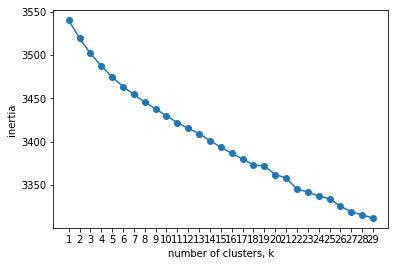

In [40]:
# 1b) plot the inertia values using matplotlib
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

1c) What can you conclude from the elbow method?

since there is no elbow KMeans is not appropriate for the data

2) Visualize your data using T-SNE
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=11
* https://www.datacamp.com/community/tutorials/introduction-t-sne


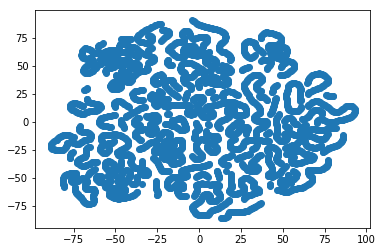

In [42]:
# 2a) plot the T-SNE graph using a learning rate of 200
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

2b) What can you conclude from T-SNE?

That our data fits into about 17 clusters

Note: T-SNE is great, but there is also some controversy on how much you should trust this algorithm:
* [Shortcomings of T-SNE](https://stats.stackexchange.com/questions/270391/should-dimensionality-reduction-for-visualization-be-considered-a-closed-probl)
* [Limitations of T-SNE](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

numpy.argsort()

### Kmeans

In [43]:
# 3a) apply k-means to our data with k=10 and print the first 10 words
# that are the most associated with each cluster centroids
# Hint: look at the cluster_centers_ of the KMeans object to find the centroids

kmeans_results = KMeans(n_clusters=10).fit(df)

for n in range(kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    
    centroid = kmeans_results.cluster_centers_[n]
    
    indicies = centroid.argsort()[-11:]
    
    for i in indicies:
        print(vocabulary[i], end=" ")
    
    print(" ")

Cluster  0 :  feet seemed stroem distance moskoe trees hundred like sea water could  
Cluster  1 :  wild head moment away sound came within eyes fell like upon  
Cluster  2 :  night character even still felt many heart condition yet long would  
Cluster  3 :  etoile rue eustache evidence gang beauvais rogt corpse madame girl marie  
Cluster  4 :  dis way well tree negro beetle dat bug massa legrand jupiter  
Cluster  5 :  window found four three open large two door room house one  
Cluster  6 :  friend good minister words king matter replied prefect letter dupin said  
Cluster  7 :  atmosphere april elevation however feet surface five great earth car balloon  
Cluster  8 :  days three torn river murder water found thicket would corpse body  
Cluster  9 :  might could matter never would mind must say nature man may  


3b) interpret the cluster above; do they make sense to you?

- cluster 0: words around the prompt and study subjects
- cluster 1: words around subjects and testing 
- cluster 2: words around data and analysis

### Hierarchical clustering

4) use hierarchical clustering on the data; feel free to refer to the datacamp lesson below: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=3

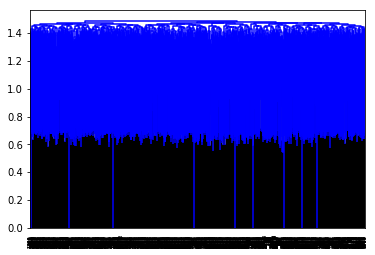

In [44]:
#4a) plot the dendogram using the link above (method = complete)

from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(df, method='complete')

# Plot the dendrogram, using words as labels
dendrogram(mergings,
           leaf_rotation=90,
)
plt.show()

4b) was the dendodram useful?

No; too many words

In [45]:
#4c) we are going to use agglomerative clustering here 
# from the sklean library 

from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(n_clusters=6).fit(df)

print(clustering)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')


In [46]:
# 4d) compute the center of the cluster
# unfortunately sklearn doesn't provide you with the centroids, but you can use the link below:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

from sklearn.neighbors.nearest_centroid import NearestCentroid

clf = NearestCentroid()
clf.fit(df, clustering.labels_)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [47]:
# 4e) print the top 10 words for each cluster centroid

centroids_words = [[] for i in range(6)]

for i in range(0,6):
    for j in range(1,11):
        n = np.argsort(clf.centroids_[i])[-j]
        centroids_words[i].append(df.columns[n])

for i in range(0,6):
    print(i,centroids_words[i])

0 ['said', 'dupin', 'man', 'may', 'poe', 'matter', 'king', 'letter', 'prefect', 'would']
1 ['marie', 'corpse', 'body', 'girl', 'evidence', 'rogt', 'river', 'would', 'found', 'madame']
2 ['balloon', 'earth', 'car', 'moon', 'great', 'surface', 'atmosphere', 'five', 'voyage', 'however']
3 ['upon', 'many', 'yet', 'night', 'came', 'heart', 'length', 'within', 'long', 'fell']
4 ['jupiter', 'legrand', 'massa', 'bug', 'dat', 'beetle', 'negro', 'gold', 'tree', 'way']
5 ['water', 'ship', 'sea', 'like', 'could', 'although', 'moskoe', 'great', 'wind', 'stroem']


4f) interpret the cluster above; do they make sense to you?

some of the clusters make sense and have common themes and some do not have an easily distinguishable common thread

### DBScan 

5) Use DBscan (with epsilon=5, min_samples=10) to cluster your data

In [52]:
# 5a) apply DBScan on your data
# Hint: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=.1, min_samples=5).fit(df)
# n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

In [53]:
# 5b) find the cluster centroid (using the code from question 4d)

# clf_DBScan = NearestCentroid()
# clf_DBScan.fit(df, db.labels_)

In [55]:
# 5c) print the top ten words
# centroids_words_DBScan = [[] for i in range(n_clusters_)]

# for i in range(0,n_clusters_):
#     for j in range(1,11):
#         n = np.argsort(clf_DBScan.centroids_[i])[-j]
#         centroids_words_DBScan[i].append(df.columns[n])

# for i in range(0,n_clusters_):
#     print(i,centroids_words_DBScan[i])

5d) How many clusters do you have? Do they make sense to you? Interpret them below. 

10 clusters

- cluster 0: words around students and learning
- cluster 1: words around student outcomes
- cluster 2: doesn't really have a common thread
- cluster 3: words around testing and scoring

### NMF

6) Use NMF to find topics in our dataset
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features?ex=3

In [56]:
# 6a) Use the code above to apply the NMF model

from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to df
model.fit(normalize_df(df, method='MinMaxScaler'))


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [57]:
# 6b) print the top ten words of each component

num_clusters = 6
centroids_words_NMF = [[] for i in range(num_clusters)]

for i in range(0,num_clusters):
    for j in range(1,11):
        n = np.argsort(model.components_[i])[-j]
        centroids_words_NMF[i].append(df.columns[n])

for i in range(0,num_clusters):
    print(i,centroids_words_NMF[i])

0 ['upon', 'one', 'could', 'would', 'may', 'even', 'must', 'mere', 'thus', 'might']
1 ['one', 'upon', 'could', 'two', 'whole', 'feet', 'lay', 'three', 'small', 'large']
2 ['could', 'balloon', 'great', 'however', 'earth', 'little', 'time', 'upon', 'five', 'day']
3 ['upon', 'yet', 'could', 'length', 'came', 'still', 'long', 'night', 'within', 'eyes']
4 ['said', 'well', 'upon', 'make', 'little', 'made', 'jupiter', 'way', 'say', 'legrand']
5 ['marie', 'one', 'found', 'upon', 'corpse', 'body', 'girl', 'madame', 'evidence', 'period']


6c) Interpret the cluster above; how do they compare to kmeans, hierarchical clustering and DBscan?

The groupings are similar but all methods produce slightly different clusters and words within those clusters. When less clusters are produced the words are harder to categorize. 

## Step 10 - Visualizing the results

## Final Step - Putting it all together: 

In [58]:
# in python code, our goal is to recreate the steps above as functions
# so that we can just one line to run topic modeling on a list of 
# documents: 
def ExtractTopicsVSM(documents, numTopics):
    ''' this functions takes in a list of documents (strings), 
        runs topic modeling (as implemented by Sherin, 2013)
        and returns the clustering results, the matrix used 
        for clustering a visualization '''
    
    # step 2: clean up the documents
    documents = clean_list_of_documents(documents)
    
    # step 3: let's build the vocabulary of these docs
    vocabulary = get_vocabulary(documents)
    
    # step 4: we build our list of 100-words overlapping fragments
    documents = flatten_and_overlap(documents)
    
    # step 5: we convert the chunks into a matrix
    matrix = docs_by_words_matrix(documents, vocabulary)
    
    # step 6: we weight the frequency of words (count = 1 + log(count))
    matrix = one_plus_log_mat(matrix, documents, vocabulary)
    
    # step 7: we normalize the matrix
    matrix = normalize(matrix)
    
    # step 8: we compute deviation vectors
    matrix = transform_deviation_vectors(matrix, documents)
    
    # step 9: we apply a clustering algorithm to find topics
    results_clustering = cluster_matrix(matrix)
    
    # step 10: we create a visualization of the topics
    visualization = visualize_clusters(results_clustering, vocabulary)
    
    # finally, we return the clustering results, the matrix, and a visualization
    return results_clustering, matrix, visualization